In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import brian2 as b2
import slab as s
from consts import Paths
from pathlib import Path
import matplotlib.pyplot as plt
from analyze.report import generate_single_result
hrtf_paths = list(Path(Paths.SOFA_DIR).iterdir())
print(hrtf_paths)

2024-11-16 16:43:17,208 [INFO ]  

>>>>> start execution
[PosixPath('../data/SOFA/dtf_nh156.sofa'), PosixPath('../data/SOFA/dtf_las_nh1012.sofa'), PosixPath('../data/SOFA/hrtf b_nh15.sofa'), PosixPath('../data/SOFA/RIEC_hrir_subject_057.sofa')]


WARNING    <>:11: SyntaxWarning: invalid escape sequence '\D'
 [py.warnings]
WARNING    <>:11: SyntaxWarning: invalid escape sequence '\D'
 [py.warnings]
WARNING    <>:11: SyntaxWarning: invalid escape sequence '\D'
 [py.warnings]
WARNING    <>:11: SyntaxWarning: invalid escape sequence '\D'
 [py.warnings]
WARNING    /tmp/ipykernel_321673/438217701.py:11: SyntaxWarning: invalid escape sequence '\D'
  f"MSO spikes for tone {res['basesound'].frequency}, $\Delta t_{'{'}inhi{'}'}=-0.4ms$,$\Delta t_{'{'}inhc{'}'}=0.2ms$",
 [py.warnings]
WARNING    /tmp/ipykernel_321673/438217701.py:11: SyntaxWarning: invalid escape sequence '\D'
  f"MSO spikes for tone {res['basesound'].frequency}, $\Delta t_{'{'}inhi{'}'}=-0.4ms$,$\Delta t_{'{'}inhc{'}'}=0.2ms$",
 [py.warnings]


2024-11-15 23:52:27,516 [DEBUG]  {'filename': 'MSO spikes for tone 100. Hz, $\\Delta t_{inhi}=-0.4ms$,$\\Delta t_{inhc}=0.2ms$', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-11-15 23:52:27,516 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


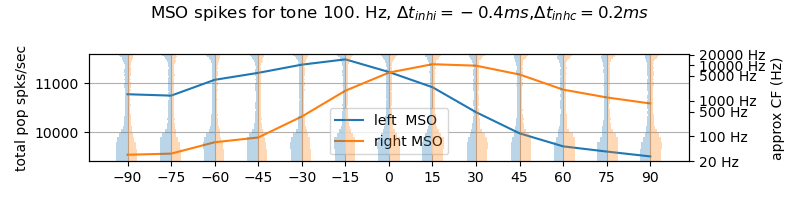

In [17]:
from analyze.report import draw_rate_vs_angle, generate_multi_inputs_single_net
import dill

for sel in [
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&ITDeffect/2024-11-15T23:36:46&tone_100.Hz_70dB&TanCarney&withICC&ITDeffect.pic"
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        fig = draw_rate_vs_angle(
            res,
            f"MSO spikes for tone {res['basesound'].frequency}, $\Delta t_{'{'}inhi{'}'}=-0.4ms$,$\Delta t_{'{'}inhc{'}'}=0.2ms$",
            rate=False,
            show_pops=["MSO"],
        )
        fig.show()

neur of interest is 120649, which is the one spiking the most at 15


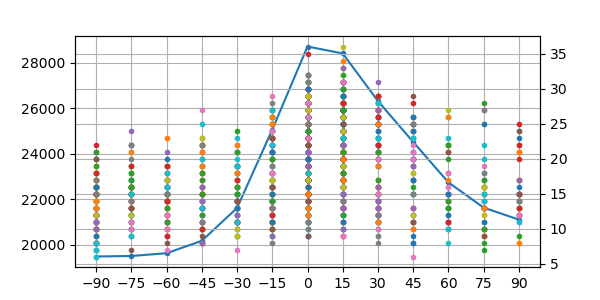

In [82]:
from collections import defaultdict
from analyze.report import draw_rate_vs_angle, generate_multi_inputs_single_net
import dill
import numpy as np

plt.close()


def spikest_neuron(d):
    times = d["times"]
    senders = d["senders"]
    id2spike = defaultdict(int)
    for i in senders:
        id2spike[i] += 1
    max_spikes = max(list(id2spike.values()))

    spikiest_neur = list(id2spike.keys())[np.argmax(list(id2spike.values()))]
    return spikiest_neur, max_spikes


def single_neuron_rate(data, check_angle=30):
    a2r = data["angle_to_rate"]
    angles = list(a2r.keys())
    fig, ax = plt.subplots(1, 1)
    num_neur = []
    num_spike = []
    neur2spikebyangle = defaultdict(list)
    single_neur_spike = []
    relevant_neuron, spikes = spikest_neuron(a2r[check_angle]["L"]["MSO"])
    relevant_neurons = [
        relevant_neuron,
        relevant_neuron + 1,
        relevant_neuron + 2,
        relevant_neuron + 3,
        relevant_neuron + 4,
        relevant_neuron + 5,
    ]
    relevant_neurons = a2r[0]['L']['MSO']['global_ids']

    for angle in angles:
        d = a2r[angle]["L"]["MSO"]
        times = d["times"]
        senders = d["senders"]
        num_neur.append(len(set(senders)))
        num_spike.append(len(times))
        id2spike = defaultdict(int)
        for i in senders:
            id2spike[i] += 1
        for n in relevant_neurons:
            neur2spikebyangle[n].append(id2spike[n])
    ax.plot(angles, num_spike, ".-", label="total number of spikes")
    ax2 = ax.twinx()
    for n, spikes in neur2spikebyangle.items():
        # ax2.plot(angles, spikes, ".-", label=f"spikes neur of interest {n}")
        angle_max_spikes = angles[np.argmax(spikes)]
        ax2.plot(angle_max_spikes, max(spikes), ".-", label=f"spikes neur of interest {n}")
    ax.set_xticks(angles)
    # fig.legend()
    print(
        f"neur of interest is {relevant_neuron}, which is the one spiking the most at {check_angle}"
    )
    plt.show()


for sel in [
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&crazystronginh/2024-11-16T23:41:04&tone_0.5kHz_70dB&TanCarney&withICC&crazystronginh.pic"
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        single_neuron_rate(res, 15)
# best results with SBC 10, but they do not correspond to our metric

2024-11-14 17:29:20,348 [DEBUG]  calculating ITD between following sounds...
2024-11-14 17:29:20,349 [DEBUG]  {'left': Sound(
    array([[ 1.20129601e-16],
           [ 6.48813511e-05],
           [ 1.27720015e-04],
           ...,
           [-2.48693630e-01],
           [-2.39397468e-01],
           [-2.25258535e-01]]),
    44.1 * khertz), 'right': Sound(
    array([[-7.80625564e-18],
           [-1.90090679e-05],
           [-3.29102714e-05],
           ...,
           [ 2.79061009e-02],
           [ 4.87228805e-02],
           [ 6.85300800e-02]]),
    44.1 * khertz)}
2024-11-14 17:29:20,351 [INFO ]  {'left_start_time': 5.57823129 * msecond, 'right_start_time': 6.28117914 * msecond}
2024-11-14 17:29:20,352 [INFO ]  calculated ITD of $-0.70294785 ms. check graphical output for confirmation.
2024-11-14 17:29:20,352 [DEBUG]  calculating ILD between following sounds...
2024-11-14 17:29:20,352 [DEBUG]  {'left': Sound(
    array([[ 1.20129601e-16],
           [ 6.48813511e-05],
          

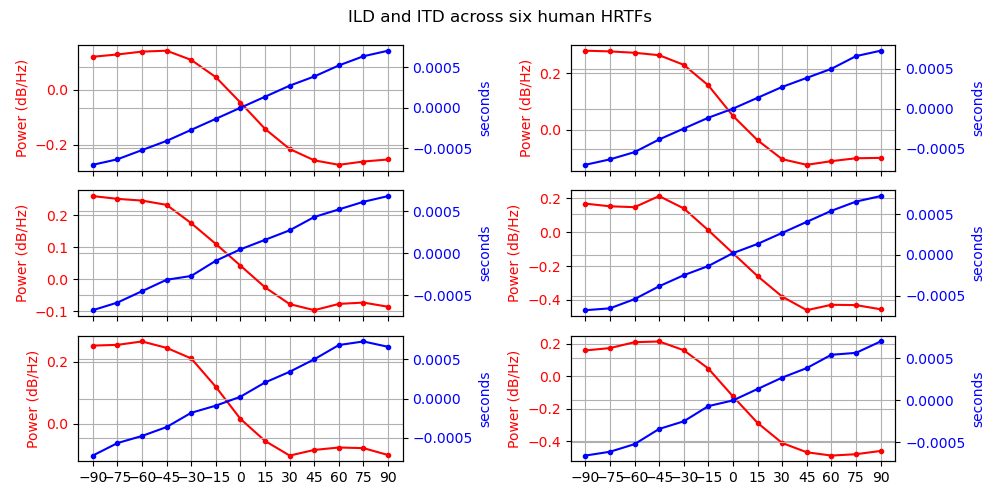

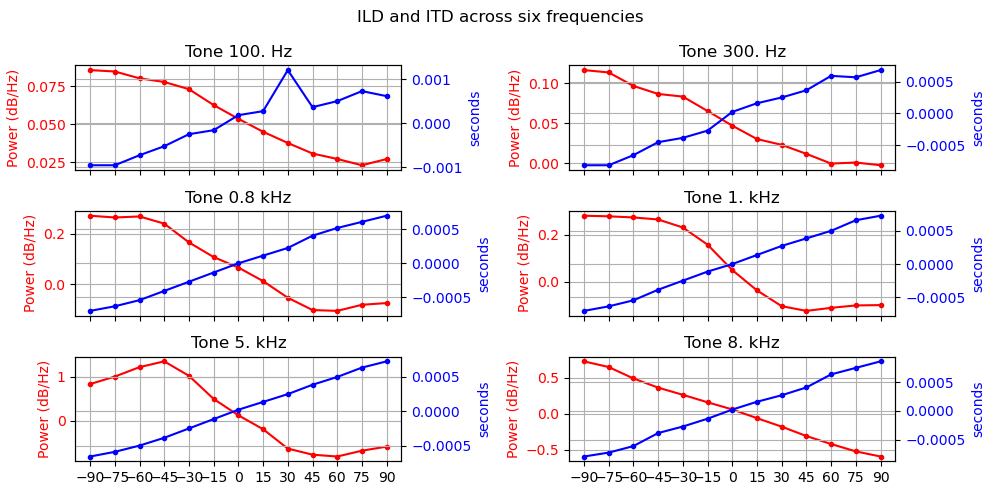

In [16]:
from analyze import sound_analysis as SA
from cochleas.GammatoneCochlea import run_hrtf
from utils.custom_sounds import Tone


def draw_ITD_ILD(tone, angles, ild, subj_number, title=None):
    # itd and ild functions are VERY verbose
    angle_to_ild = {}
    angle_to_itd = {}
    for angle in angles:
        binaural_sound = run_hrtf(
            tone,
            angle,
            subj_number,
        )
        left = binaural_sound.left
        right = binaural_sound.right
        angle_to_itd[angle] = SA.itd(left, right)
        ild_res, all_freq_diff = SA.ild(left, right, tone.sound)
        angle_to_ild[angle] = ild_res

        # total_diff = np.sum(all_freq_diff)
    ild.set_ylabel("Power (dB/Hz)", color="r")
    ild.plot(
        angles,
        [angle_to_ild[angle] for angle in angles],
        label="ILD",
        marker=".",
        color="r",
    )
    ild.tick_params(axis="y", labelcolor="r")
    itd = ild.twinx()
    itd.set_ylabel("seconds", color="b")
    itd.plot(
        angles,
        [angle_to_itd[angle] for angle in angles],
        label="ITD",
        marker=".",
        color="b",
    )
    itd.tick_params(axis="y", labelcolor="b")
    if title is not None:
        ax.set_title(title)
    plt.setp([ild, itd], xticks=angles)
    return


from typing import Iterable


def flatten(items):
    """Yield items from any nested iterable.
    from https://stackoverflow.com/a/40857703
    """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x


fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
axs = flatten(axs)
tone = Tone(1000 * b2.Hz)
angles = list(range(-90, 91, 15))
for ax, subj_number in zip(axs, [0,1,2,4,5,6,7]):
    draw_ITD_ILD(tone, angles, ax, subj_number)
fig.suptitle("ILD and ITD across six human HRTFs")
fig.tight_layout()
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
axs = flatten(axs)
frequencies = [100, 300, 800, 1000, 5000, 8000] * b2.Hz
tones = [Tone(i) for i in frequencies]
angles = list(range(-90, 91, 15))
for ax, tone,freq in zip(axs, tones, frequencies):
    draw_ITD_ILD(tone, angles, ax, 1, title=f"Tone {freq}" )
fig.suptitle("ILD and ITD across six frequencies")
fig.tight_layout()

In [2]:
hrtf = s.HRTF(hrtf_paths[2])
# print(hrtf.n_sources)
# fig, ax = plt.subplots(2)
# sourceidx = hrtf.cone_sources(0)
# ax[0].set_title("waterfall plot")
# ax[1].set_title("image plot")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[0], show=False, kind="waterfall")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[1], show=False, kind="image")
# plt.tight_layout()
# plt.show()


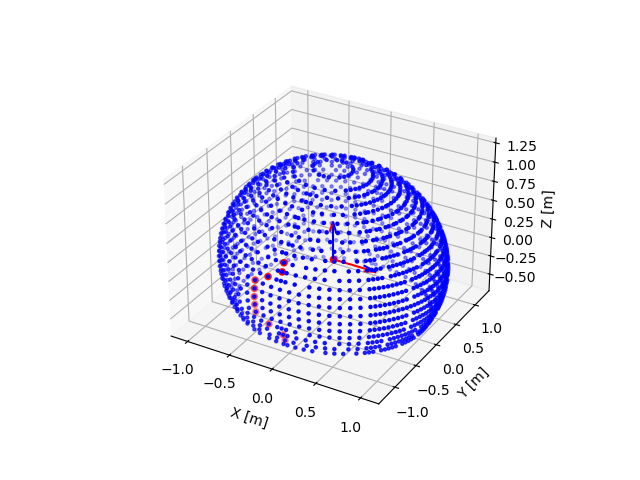

In [12]:
import brian2 as b2
import brian2hears as b2h
from utils.custom_sounds import Tone
import numpy as np
plt.close()
hrtf = s.HRTF(hrtf_paths[2])
# hrtf = s.HRTF.kemar()
input = Tone(100 * b2.Hz, 100 * b2.ms)


sourceidx = hrtf.cone_sources(-55, False)
hrtf.plot_sources(sourceidx)

# bin = hrtf.apply(sourceidx, s.Sound(input.sound))


# res = s.HRTF(hrtf_paths[2]).interpolate(-45,0).apply(s.Sound(input.sound).resample())
# print(res)


In [ ]:
# next try SOFAR it seems integrated with pyfar